In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel("HousePricePrediction.xlsx")

In [6]:
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [15]:
dataset.shape

(2919, 13)

In [16]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

inte = (dataset.dtypes == 'int')
num_cols = list(inte[inte].index)
print("Integer variables:", len(num_cols))

flo = (dataset.dtypes == 'float')
flo_cols = list(flo[flo].index)
print("Float variables:", len(flo_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


<Axes: >

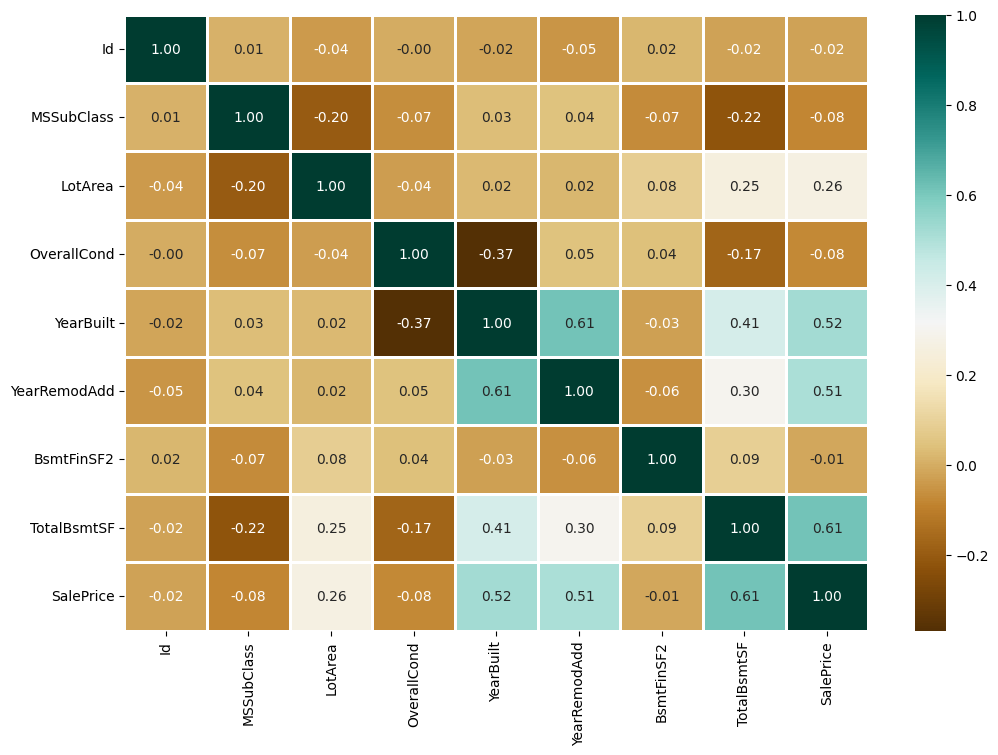

In [17]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

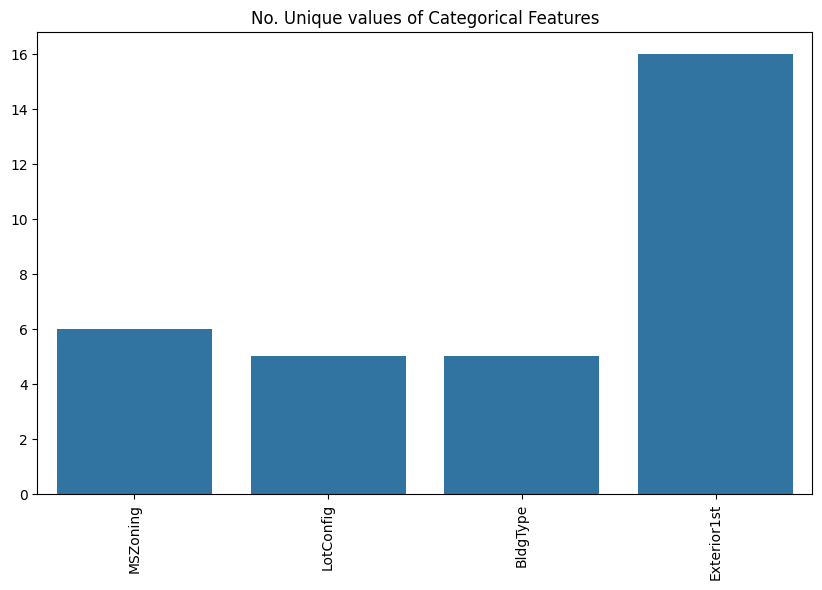

In [19]:
unique_values = []

for col in object_cols:
  unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation = 90)
sns.barplot(x = object_cols, y = unique_values)

<ipython-input-21-ff7f758e108e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


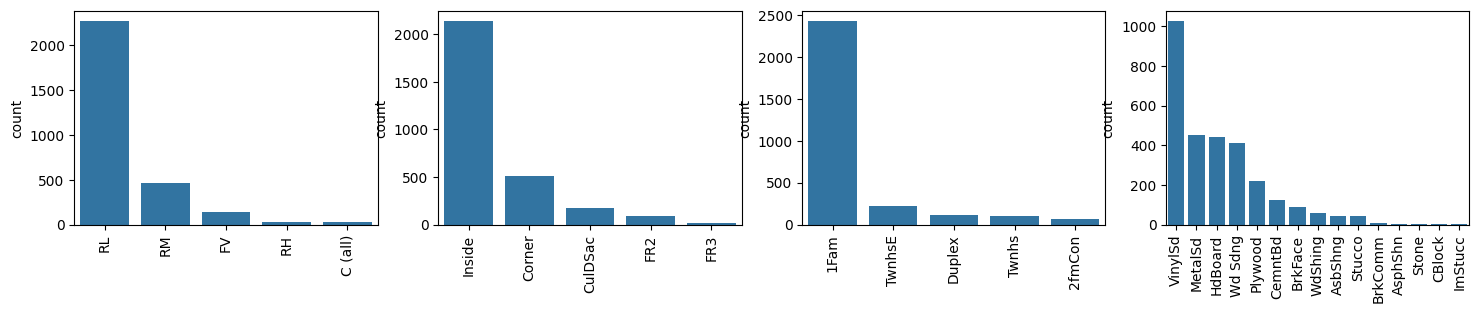

In [21]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
  y = dataset[col].value_counts()
  plt.subplot(11, 4, index)
  plt.xticks(rotation = 90)
  sns.barplot(x = list(y.index), y=y)
  index += 1

In [22]:
dataset.drop(['Id'],
             axis = 1,
              inplace = True)

In [23]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [24]:
new_dataset = dataset.dropna()

In [25]:
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [26]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [28]:
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size = 0.8, test_size=0.2, random_state=0)

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [33]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.1912869050091275

In [34]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1874168384159986


In [36]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score = r2_score(Y_valid, preds)
cb_r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 51.6ms	remaining: 51.6s
1:	learn: 55780.1567575	total: 53.9ms	remaining: 26.9s
2:	learn: 55060.9599505	total: 56.1ms	remaining: 18.6s
3:	learn: 54456.1126921	total: 58.3ms	remaining: 14.5s
4:	learn: 53901.1464265	total: 60.3ms	remaining: 12s
5:	learn: 53334.6062357	total: 62.5ms	remaining: 10.4s
6:	learn: 52824.4943646	total: 64.3ms	remaining: 9.13s
7:	learn: 52381.4267520	total: 66.5ms	remaining: 8.24s
8:	learn: 51841.0364316	total: 68.5ms	remaining: 7.54s
9:	learn: 51281.5852560	total: 70.5ms	remaining: 6.98s
10:	learn: 50825.3817438	total: 72.7ms	remaining: 6.54s
11:	learn: 50477.2609796	total: 74.7ms	remaining: 6.15s
12:	learn: 50081.4097641	total: 76.7ms	remaining: 5.82s
13:	learn: 49663.6380360	total: 78.5ms	remaining: 5.53s
14:	learn: 49334.5782662	total: 80.6ms	remaining: 5.29s
15:	learn: 48967.5221026	total: 82.9ms	remaining: 5.1s
16:	learn

0.38351169878113034